In [8]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

1- Carregamos e pré-processamos os dados


In [2]:
# Caaregar dados
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalização (0-1) e One-Hot Encoding
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


2- Arquitetura CNN com keras

In [4]:
model = Sequential([
    # Primeiro bloco convolucional
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Dropout para evitar overfitting

    # Segundo bloco convolucional
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Camadas densas (fully connected)
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Dropout mais agressivo na camada densa
    Dense(10, activation='softmax')  # Saída com 10 classes (CIFAR-10)
])

3- Compilar Modelo

In [5]:
# 3. Compilar o modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

4- Evitar Overfiting com Early Stopping

In [6]:
# Callback para evitar overfitting (Early Stopping)
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

5- Treinamos a Rede


In [7]:
# Treino do modelo
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_test, y_test),  # Dados de validação
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 321s 404ms/step - accuracy: 0.3804 - loss: 1.8361 - val_accuracy: 0.5387 - val_loss: 1.2513
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 312s 391ms/step - accuracy: 0.6240 - loss: 1.0739 - val_accuracy: 0.6898 - val_loss: 0.8791
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 324s 394ms/step - accuracy: 0.6858 - loss: 0.9110 - val_accuracy: 0.6843 - val_loss: 0.8725
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 309s 378ms/step - accuracy: 0.7154 - loss: 0.8175 - val_accuracy: 0.6985 - val_loss: 0.8619
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 304s 388ms/step - accuracy: 0.7372 - loss: 0.7616 - val_accuracy: 0.7582 - val_loss: 0.6899
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 304s 389ms/step - accuracy: 0.7543 - loss: 0.7058 - val_accuracy: 0.7594 - val_loss: 0.6833
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 324s 392ms/step - accuracy: 0.7669 - loss: 0.6733 - val_accuracy: 0.7646 - val_loss: 0.6641
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 314s 382ms/step - accuracy: 0.7800 -

6- Avaliamos o modelo

In [9]:
# Printar acuracia
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"\nAcurácia REAL no teste: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.7682 - loss: 0.6661

Acurácia REAL no teste: 76.63%


Plotar a evolução do treinamento

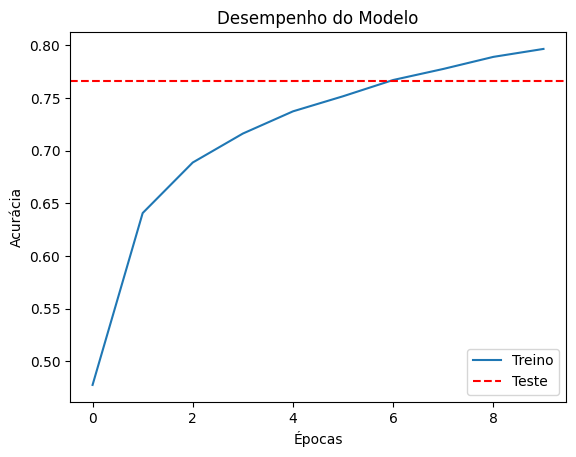

In [10]:
# plotamos treino
plt.plot(history.history['accuracy'], label='Treino')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Teste')
plt.title('Desempenho do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()